In [11]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


### importing the necessary packages required for data pre-processing, association rule mining, and visualisation
### doing a sanity check to understand the data and to fill in for any missing values

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [27]:
df = pd.read_csv('/Users/soujanyabhat/Downloads/Market Basket Optimisation.csv', header=None)

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(7501, 20)

### creating an empty list called transaction that iterates and appends items from df while dropping the null values

In [34]:
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

In [36]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

### here the list transactions is first transformed into a binary matrix : here to 0's and 1's as type is specified while the matrix is converted to a dataframe making it easier for operations

In [39]:
basket = TransactionEncoder()
basket_ary = basket.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(basket_ary, columns=basket.columns_)
df_encoded = df_encoded.astype(int)

print("binary matrix is as follows arranged according to the alphabetical order")
print(df_encoded)

binary matrix is as follows arranged according to the alphabetical order
       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0              0        1                  1          0        1            0   
1              0        0                  0          0        0            0   
2              0        0                  0          0        0            0   
3              0        0                  0          0        1            0   
4              0        0                  0          0        0            0   
...          ...      ...                ...        ...      ...          ...   
7496           0        0                  0          0        0            0   
7497           0        0                  0          0        0            0   
7498           0        0                  0          0        0            0   
7499           0        0                  0          0        0            0   
7500           0        0           

### now performing exploratory data analysis understanding what products are popular, the customer preferences and the relevant itemsets

### printing the 15 most popular items (frequent items) by sorting the encoded dataframe values in descending order and plotting the relative frequency and frequency of items with the help of barplot

In [43]:
item_counts = df_encoded.sum().sort_values(ascending=False)
print("15 most popular items") 
print(item_counts.head(15))

15 most popular items
mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
burgers               654
cake                  608
cookies               603
escalope              595
low fat yogurt        574
dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


<Axes: >

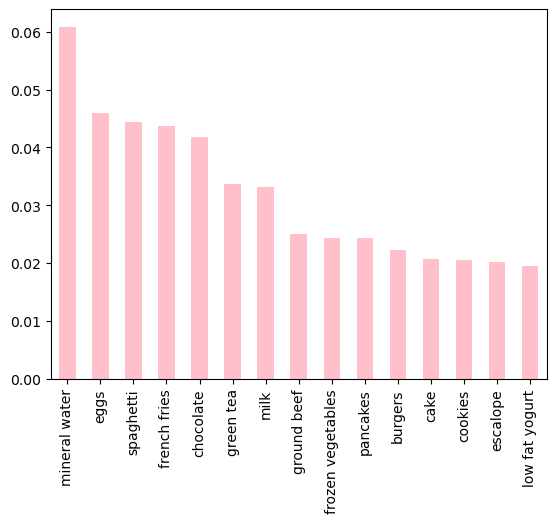

In [45]:
df.stack().value_counts(normalize=True)[:15].plot(kind='bar', color='pink') ##relative frequency

<Axes: ylabel='count'>

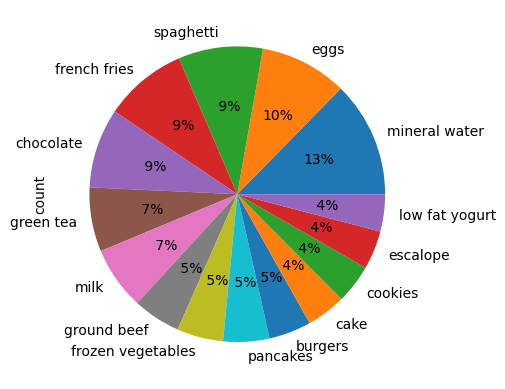

In [47]:
df.stack().value_counts().apply(lambda item: item/df.shape[0])[:15].plot(kind='pie', autopct='%2.0f%%') ##frequency

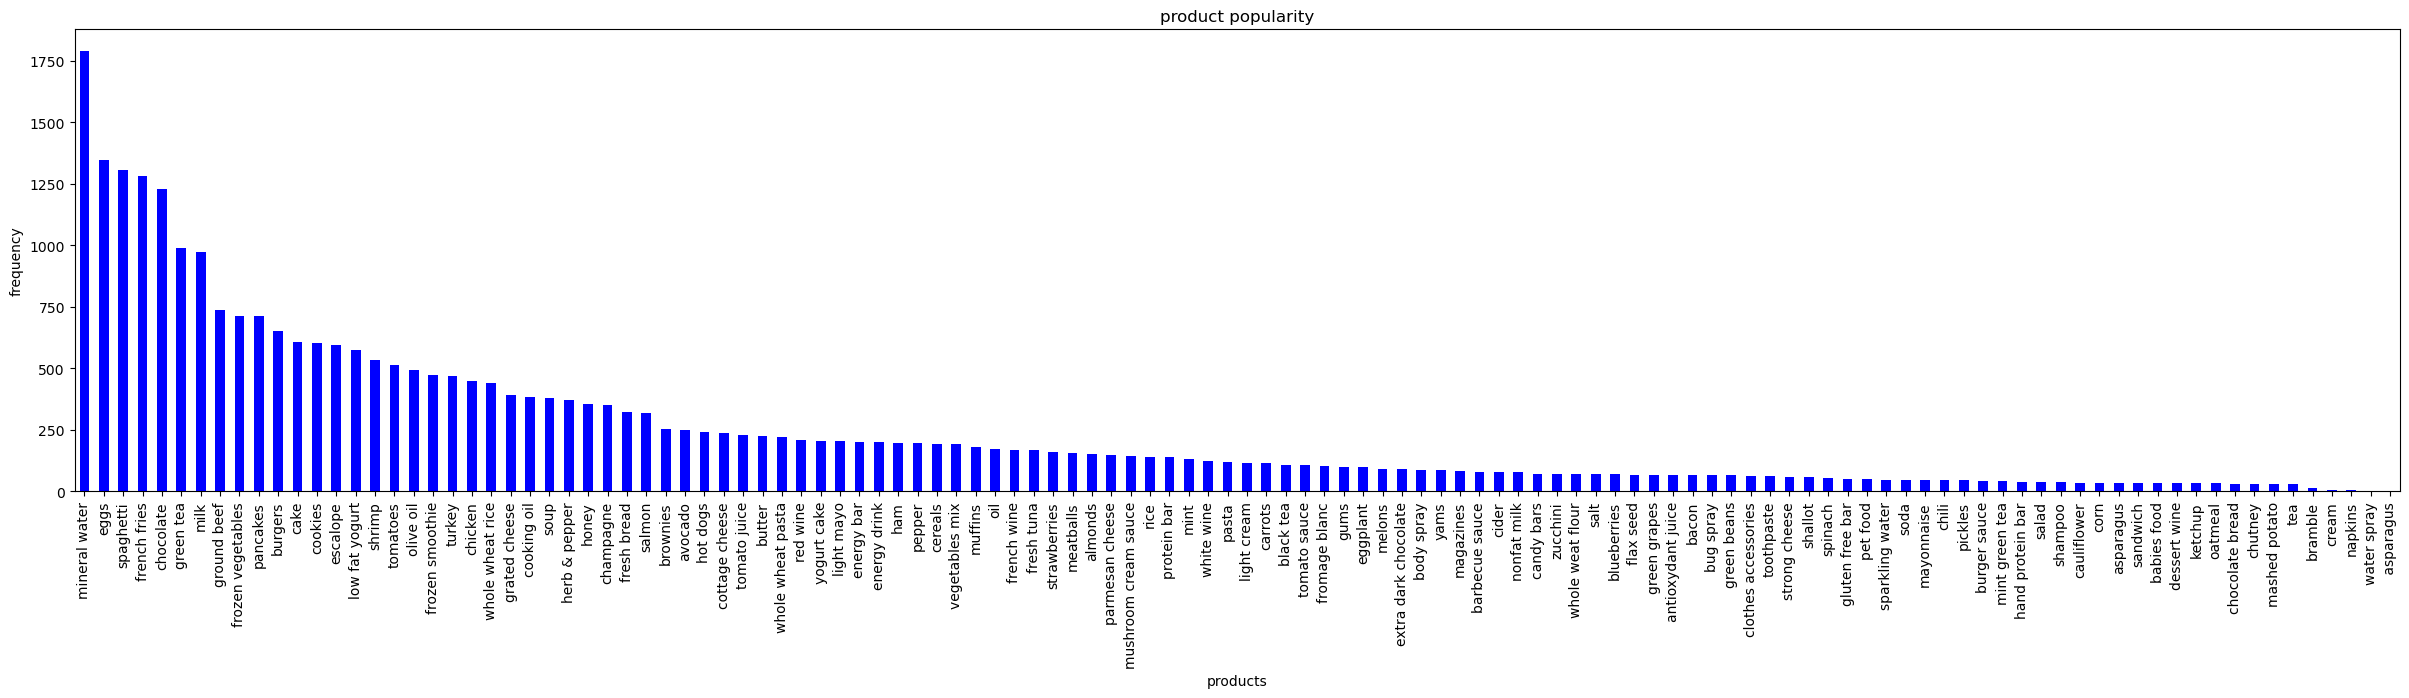

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
item_counts.plot(kind='bar', color='blue')
plt.title('product popularity')
plt.xlabel('products')
plt.ylabel('frequency')
plt.show()

### finding the frequent itemsets in the database based on the apriori algorithm and its subsequent association rules with min_support and lift as parameters respectively

In [52]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemset = apriori(df_encoded,min_support=0.03,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [54]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,0.003751,1.025603,0.137757
1,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
3,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
4,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
5,(chocolate),(milk),0.163845,0.129583,0.032129,0.196094,1.513276,0.010898,1.082736,0.405645
6,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
7,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
8,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070,0.329550
9,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581,0.325505


### visualising the top 10 frequent item sets based on the support

In [57]:
frequent_itemsets = frequent_itemset.sort_values(by='support', ascending=False)

In [59]:
frequent_itemsets

,support,itemsets
25,0.238368,(mineral water)
11,0.179709,(eggs)
31,0.174110,(spaghetti)
13,0.170911,(french fries)
7,0.163845,(chocolate)
18,0.132116,(green tea)
24,0.129583,(milk)
19,0.098254,(ground beef)
16,0.095321,(frozen vegetables)
27,0.095054,(pancakes)


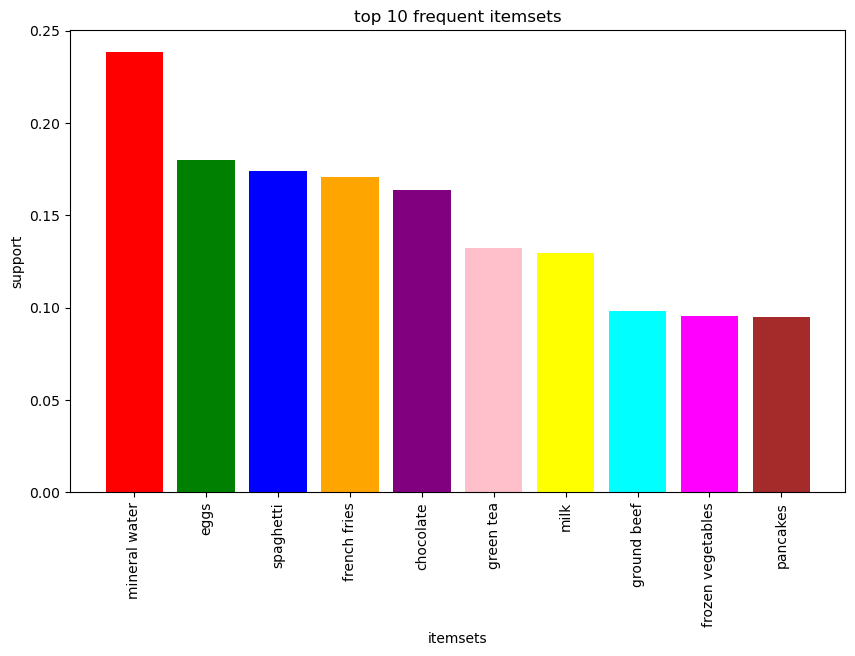

In [61]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
top_itemsets = frequent_itemsets.head(10)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'brown']
plt.figure(figsize=(10, 6))
plt.bar(top_itemsets['itemsets'], top_itemsets['support'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('itemsets')
plt.ylabel('support')
plt.title('top 10 frequent itemsets')
plt.show()

### filtering the dataframe rules based on confidence and lift where confidence is > 0.3 and lift greater than 1

In [64]:
rules[(rules['confidence']>0.3) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
19,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
20,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
22,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
25,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
29,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712
31,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


### by visualising for confidence, lift and support a cross selling strategy matrix can be found for itemsets with high confidence, support and lift

### visualising the itemsets based on their confidence values : the antecedents are matched with the consequents

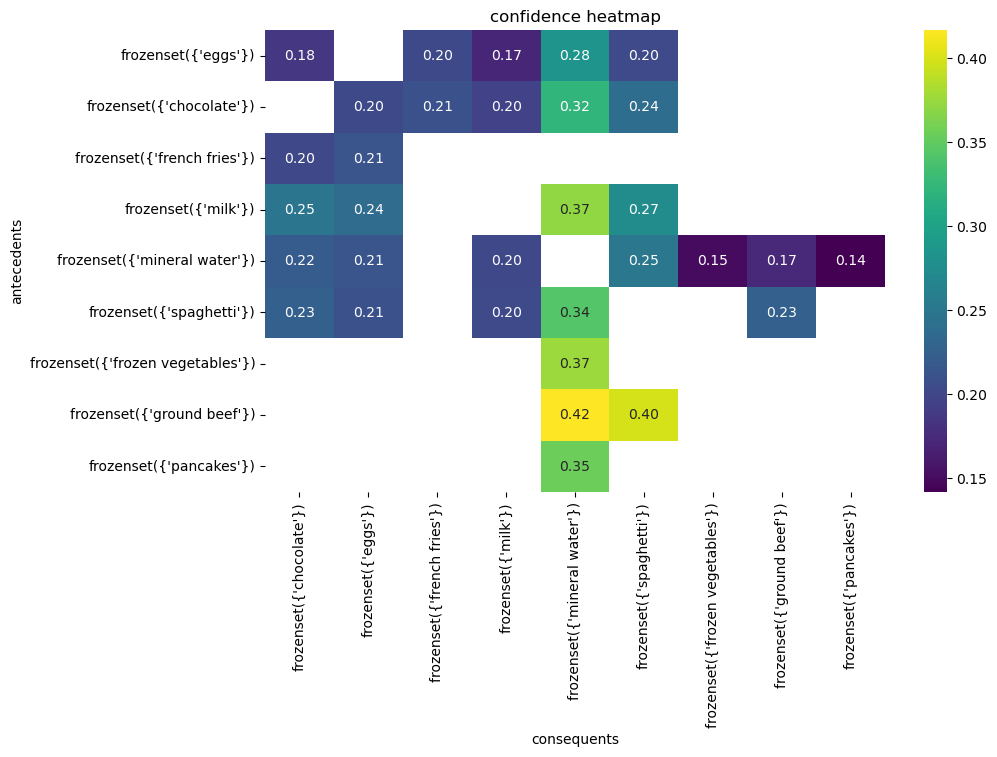

In [68]:
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis")
plt.title("confidence heatmap")
plt.xlabel("consequents")
plt.ylabel("antecedents")
plt.show()

### visualising itemsets based on their support values : antecedents are matched with consequents

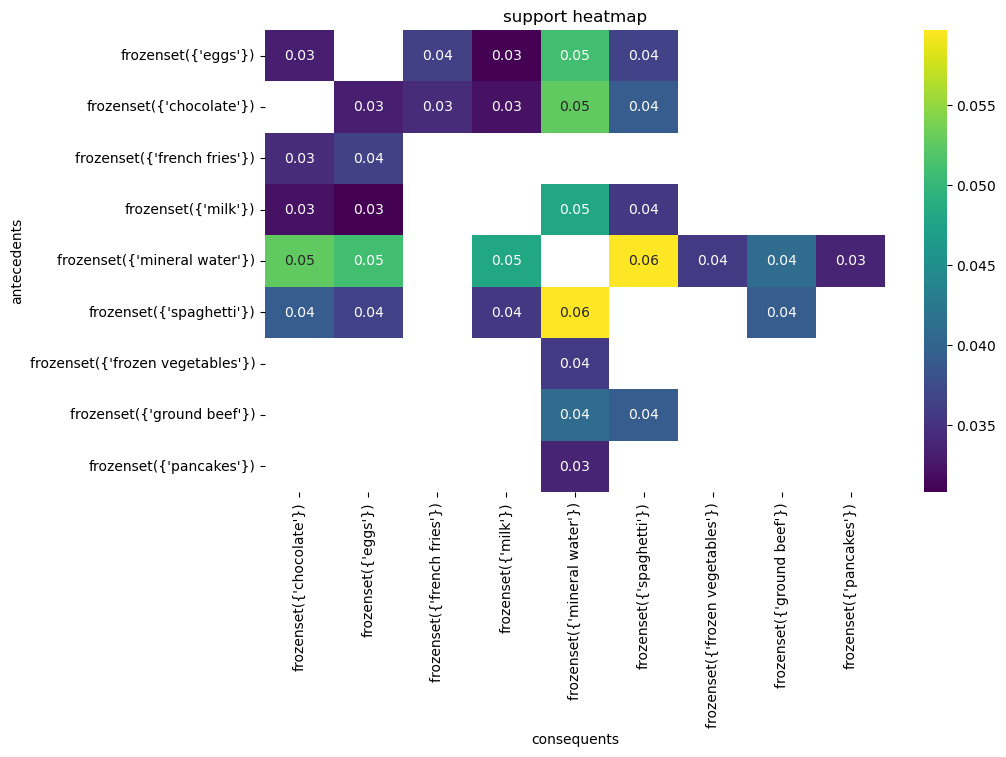

In [71]:
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='support')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis")
plt.title("support heatmap")
plt.xlabel("consequents")
plt.ylabel("antecedents")
plt.show()

### visualising itemsets based on their lift values : antecedent matched with consequent

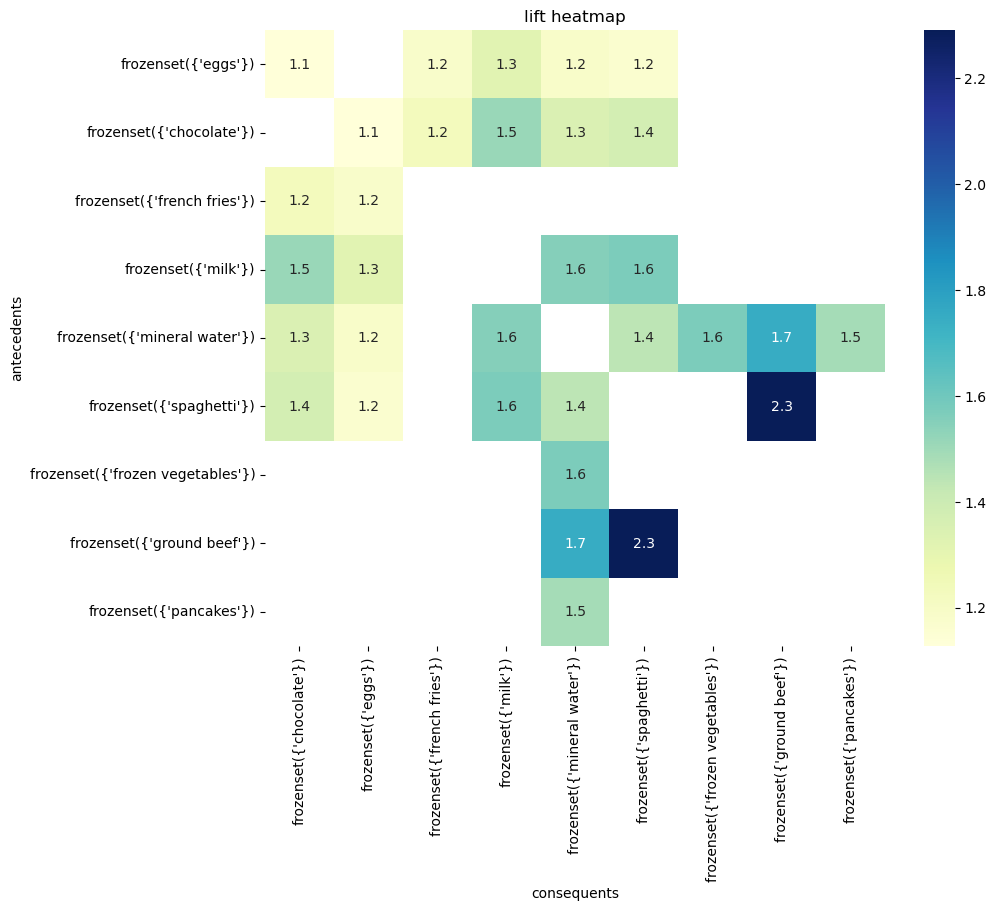

In [74]:
pivot=rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10,8))
plt.title("lift heatmap")
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.show()

### heatmap visualising lift, support, and confidence values checking for  any relationship between them. 
### the value here shows that the variables have a moderate positive correlation indicating that if one value increases, the other does too.

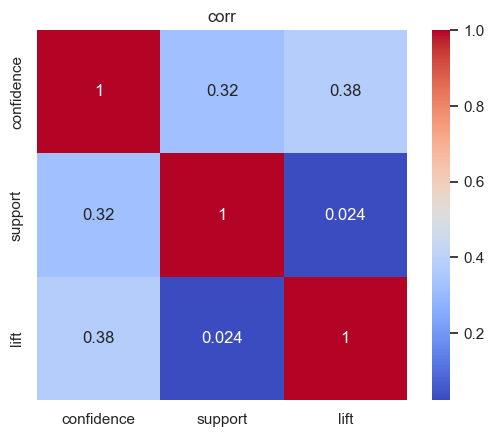

In [77]:
sns.set()
corr_matrix = rules[['confidence', 'support', 'lift']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('corr')
plt.show()

### finding the worst choice items to buy together by lift values and visualising it using an nx (undirected) graph

In [80]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('worst choice items to buy together')
print("~~~~~~~~~")
print(worst_choice[['antecedents','consequents','confidence','lift']])

worst choice items to buy together
~~~~~~~~~
            antecedents          consequents  confidence      lift
0                (eggs)          (chocolate)    0.184718  1.127397
1           (chocolate)               (eggs)    0.202604  1.127397
16          (spaghetti)               (eggs)    0.209801  1.167446
17               (eggs)          (spaghetti)    0.203264  1.167446
11               (eggs)       (french fries)    0.202522  1.184961
10       (french fries)               (eggs)    0.212949  1.184961
14      (mineral water)               (eggs)    0.213647  1.188845
15               (eggs)      (mineral water)    0.283383  1.188845
2        (french fries)          (chocolate)    0.201248  1.228284
3           (chocolate)       (french fries)    0.209927  1.228284
12               (milk)               (eggs)    0.237654  1.322437
13               (eggs)               (milk)    0.171365  1.322437
6       (mineral water)          (chocolate)    0.220917  1.348332
7           (choc

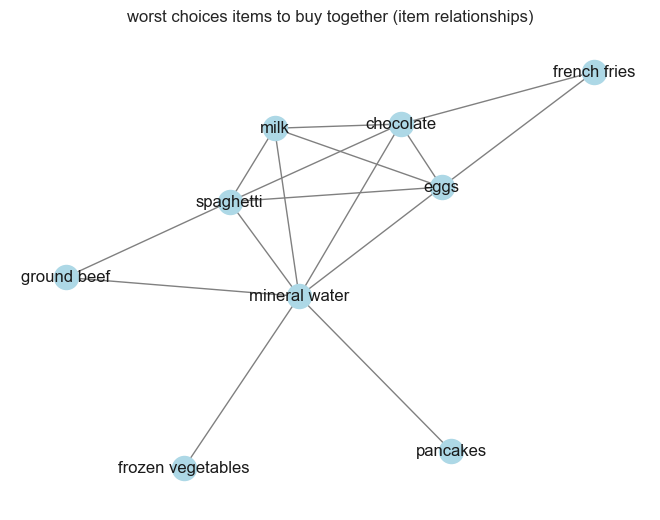

In [82]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for index, row in worst_choice.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('worst choices items to buy together (item relationships)')
plt.show()

### finding the best choice items to buy together by lift values and visualising it using an nx (undirected) graph

In [85]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('best choice items to buy together')
print("~~~~~~~~~")
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

best choice items to buy together
~~~~~~~~~
            antecedents          consequents  confidence      lift
20        (ground beef)      (mineral water)    0.416554  1.747522
22        (ground beef)          (spaghetti)    0.398915  2.291162
19  (frozen vegetables)      (mineral water)    0.374825  1.572463
25               (milk)      (mineral water)    0.370370  1.553774
29           (pancakes)      (mineral water)    0.354839  1.488616
31          (spaghetti)      (mineral water)    0.343032  1.439085
7           (chocolate)      (mineral water)    0.321400  1.348332
15               (eggs)      (mineral water)    0.283383  1.188845
27               (milk)          (spaghetti)    0.273663  1.571779
30      (mineral water)          (spaghetti)    0.250559  1.439085
4                (milk)          (chocolate)    0.247942  1.513276
9           (chocolate)          (spaghetti)    0.239219  1.373952
12               (milk)               (eggs)    0.237654  1.322437
23          (spagh

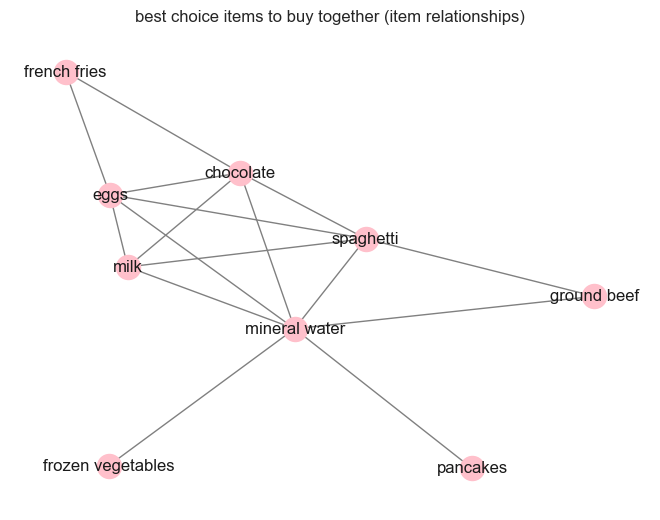

In [87]:
G = nx.Graph()
for index, row in best_choice.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent)

nx.draw(G, with_labels=True, node_color='pink', edge_color='gray')
plt.title('best choice items to buy together (item relationships)')
plt.show()

### visualising items in store to ensure the best selling strategy making high profits (based on confidence)

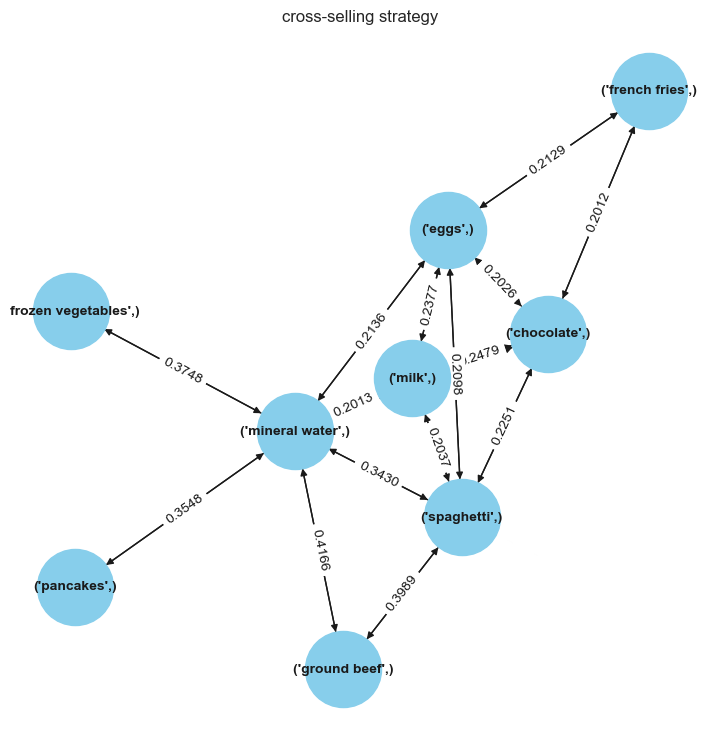

In [107]:
G = nx.DiGraph()
for _, rule in rules.iterrows():
    antecedent = tuple(rule['antecedents'])
    consequent = tuple(rule['consequents'])
    confidence = rule['confidence']
    G.add_edge(antecedent, consequent, weight=confidence)
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
edge_labels = {(tuple(k[0]), tuple(k[1])): f'{v:.4f}' for k, v in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('cross-selling strategy')
plt.show()